# Dream3 DAG for 20 genes

In this notebook, we use the Python methods in this repo to find a DAG for 20 yeast genes out of the ~ 6,000 genes possesed by wild yeast. The same functions can be used to find a DAG for all the 5112 genes measured in the Dream3 dataset, but in this notebook, for simplicity, we just deal with the first 20. Our goal is to understand the performace of our software for a low number of genes before graduating to all of them.

NOTE: For this notebook to run properly, you must first have split the full DREAM3 dataset into 4 "strain" datasets (see `jupyter_notebooks/dream3_dataset.ipynb`)

In [1]:
# this makes sure it starts looking for things from the project folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\gene_causal_mapper


In [2]:
from DagAtlas import *

Beginning to extract a dag from 2 recs: rec1=wild, rec2=gat1
Entering TS_Record.get_gene_to_bridges() for rec1=wild, rec2=gat1
Exiting TS_Record.get_gene_to_bridges()
gene to num of bridges=
{'RPS25B': 8, 'NUP2': 2, 'VRP1': 4, 'YHC1': 8, 'MET17': 7, 'STT4': 2, 'UBC12': 1, 'CDA1': 1, 'CDA2': 16, 'IMH1': 6, 'CDC25': 7, 'SPH1': 2, 'CDC3': 2, 'NKP2': 2}
RPS25B
t1(x1, xdot1)----t2(x2, xdot2)
1,  20(-0.106, 0.0077)----45(-0.124, 0.00673)
2,  20(-0.106, 0.0077)----120(-0.13, 0.0171)
3,  45(-0.119, 0.0219)----120(-0.13, 0.0171)
4,  60(-0.167, -0.00322)----0(-0.132, -0.0115)
5,  60(-0.167, -0.00322)----45(-0.124, 0.00673)
6,  60(-0.167, -0.00322)----60(-0.166, -0.00278)
7,  90(-0.245, -0.00258)----10(-0.247, -0.0115)
8,  120(-0.194, 0.00169)----60(-0.166, -0.00278)
NUP2
t1(x1, xdot1)----t2(x2, xdot2)
1,  20(-0.14, 0.00987)----120(-0.0936, 0.00757)
2,  90(-0.358, -0.00645)----90(-0.321, -0.0149)
VRP1
t1(x1, xdot1)----t2(x2, xdot2)
1,  0(0.0, 0.00116)----60(0.00289, 0.011)
2,  10(0.0116, 0.00116)

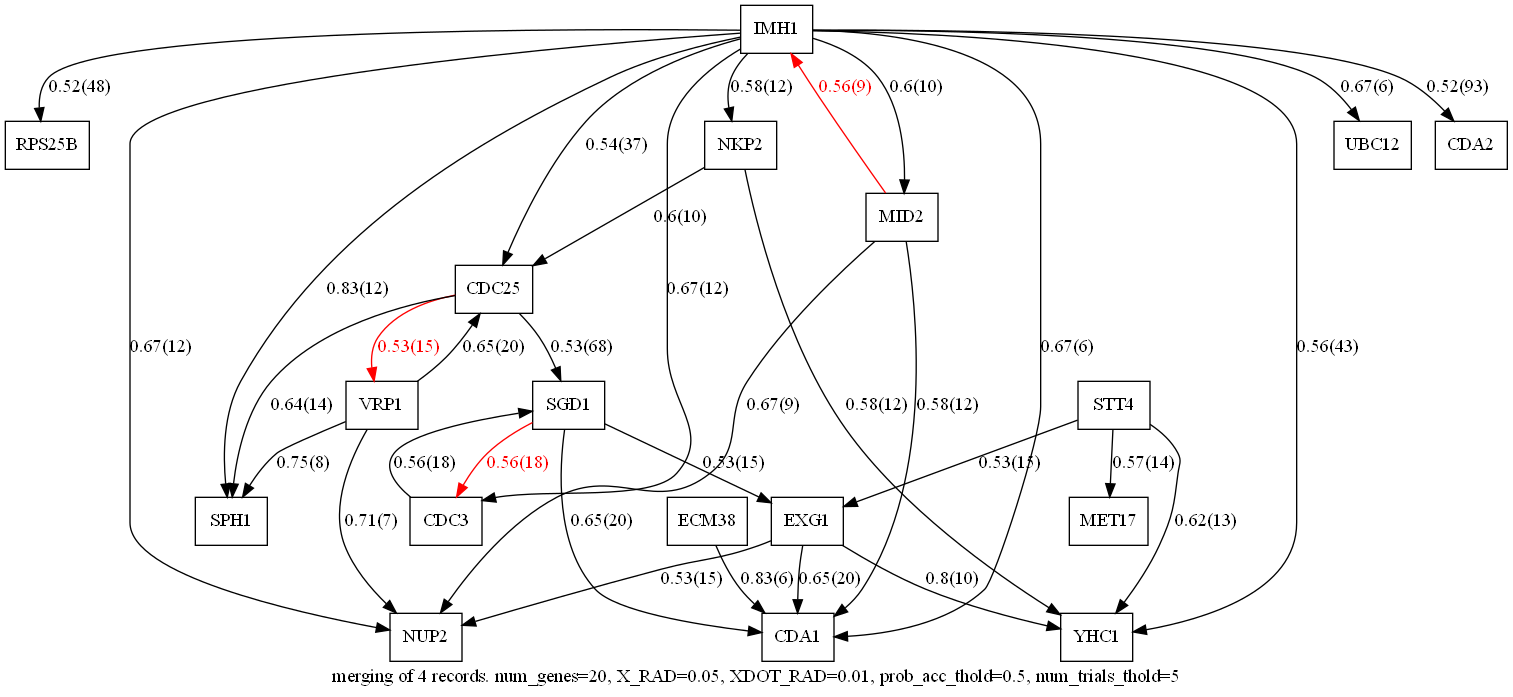

In [3]:
prob_acc_thold = 0.5
num_trials_thold = 5
num_genes = 20
title= "merging_4_records"
in_path_pkl = f"data/{title}.pkl"
caption = (f"merging of 4 records. num_genes={num_genes}, "
         f"X_RAD={X_RAD}, XDOT_RAD={XDOT_RAD}, "
         f"prob_acc_thold={prob_acc_thold}, "
         f"num_trials_thold={num_trials_thold}")
verbose = True
dag = DagAtlas.extract_dag_from_n_recs_mem1(
    STRAINS,
    title,
    num_genes,
    verbose)

dag.save_self(in_path_pkl)
dag1 = Dag(title, in_path_of_pkl=in_path_pkl)
dag1.draw(prob_acc_thold,
          num_trials_thold,
          caption,
          jupyter=True,
          circo=False)


NOTE: When there are two arrows X->Y and X<-Y between genes X, Y, we draw one of them red 